In [18]:
from utilities import *
import matplotlib.pyplot as plt
from astropy.table import QTable
plt.rcParams['figure.dpi'] = 300
plothome='/blue/adamginsburg/d.jeff/SgrB2DS_COMAnalysis/plots/LiteratureComparisonPlots/'

In [15]:
dsratiomeasurements=QTable.read(f'/blue/adamginsburg/d.jeff/SgrB2DS_COMAnalysis/tables/thesis_ethanolmethanol_results/ratios_at_central_pixel.fits')
ds_distances=np.ones(len(dsratiomeasurements))*(0.1*u.kpc)
ds_distances

<Quantity [0.1, 0.1, 0.1, 0.1] kpc>

In [4]:
chen2023_ethanolcolumn=np.array([3.1,5.5,17,24,12,8,2.8,8.5,1.4,0.2,6,1.6,2,1.3])*10**16*u.cm**-2
chen2023_ethanolcolumnerror=np.array([0.8,1.5,4,4,3,2,0.7,1.5,0.3,0.05,1.5,0.3,0.5,0.4])*10**16*u.cm**-2
chen2023_ethanoltex=np.array([160,170,160,160,170,180,120,160,140,180,140,190,180,180])*u.K
chen2023_ethanoltexerror=np.array([40,30,np.nan,40,30,20,40,20,40,np.nan,40,50,30,20])*u.K

chen2023_methanolcolumn=np.array([3.6,4.4,13,26,9.6,7.9,1.8,8.2,1.4,0.53,2.1,4.9,5.4,3.9])*10**18*u.cm**-2
chen2023_methanolcolumnerror=np.array([1.1,1.3,4,7,2.8,2.3,0.7,2.5,0.3,0.2,0.8,1.5,1.6,1.1])*10**18*u.cm**-2
chen2023_ethanolmethanolratios=chen2023_ethanolcolumn/chen2023_methanolcolumn
chen2023_ethanolmethanolratioserror=np.sqrt(((1/chen2023_methanolcolumn)*(chen2023_ethanolcolumnerror))**2+((-chen2023_ethanolcolumn/(chen2023_methanolcolumn**2))*(chen2023_methanolcolumnerror))**2)

chen2023_sourcegalactocentricdistances=[4.4,5.1,5,4.2,6.8,6.8,6.3,6.4,6.6,5.4,5.3,6.4,6.4,6.8]*u.kpc

In [5]:
bonfand2019_ethanolcolumn=np.array([2e18,3.1e17,2.5e16,1e17])*u.cm**-2
bonfand2019_methanolcolumn=np.array([4e19,7.5e18,2.5e17,2e18])*u.cm**-2
bonfand2019_ethanolmethanolratio=bonfand2019_ethanolcolumn/bonfand2019_methanolcolumn
bonfand2019_distances=np.ones(4)*(0.1*u.kpc)#jeff2024_dGC
bonfand2019_trots=[150,145,145,145]*u.K
print(bonfand2019_distances)

[0.1 0.1 0.1 0.1] kpc


In [6]:
shimonishi2021_ethanolcolumn=9.6e14*u.cm**-2
shimonishi2021_ethanolcolumnerror=1.3e14*u.cm**-2
shimonishi2021_ethanoltrot=136*u.K
shimonishi2021_ethanoltroterror=np.array([[14],[12]])*u.K

shimonishi2021_methanolcolumn=1.9e16*u.cm**-2
shimonishi2021_methanolcolumnerror=0.1e16*u.cm**-2
shimonishi2021_methanoltrot=245*u.K
shimonishi2021_methnoltroterror=4*u.K

shimonishi2021_ethanolmethanolratio=shimonishi2021_ethanolcolumn/shimonishi2021_methanolcolumn
shimonishi2021_ethanolmethanolratioerror=np.sqrt(((1/shimonishi2021_methanolcolumn)*(shimonishi2021_ethanolcolumnerror))**2+((-shimonishi2021_ethanolcolumn/(shimonishi2021_methanolcolumn**2))*(shimonishi2021_methanolcolumnerror))**2)
shimonishi2021_distance=19.0*u.kpc

In [7]:
#chen2023_datatable=QTable([chen2023_sourcegalactocentricdistances,chen2023_ethanolcolumn,chen2023_ethanolcolumnerror,chen2023_methanolcolumn,
#                           chen2023_methanolcolumnerror,chen2023_ethanoltex,chen2023_ethanoltexerror,
#                           chen2023_ethanolmethanolratios,chen2023_ethanolmethanolratioserror],names=['Galactocentric_Distance','N_C2H5OH','Error_N_C2H5OH','N_CH3OH','Error_N_CH3OH','Tex_C2H5OH','Error_Tex_C2H5OH','Ethanol_Methanol_Ratio','Error_Ethanol_Methanol_Ratio'])
chen2023_datatable=QTable.read('../literature_data/chen2023_ethanolmethanol.fits')

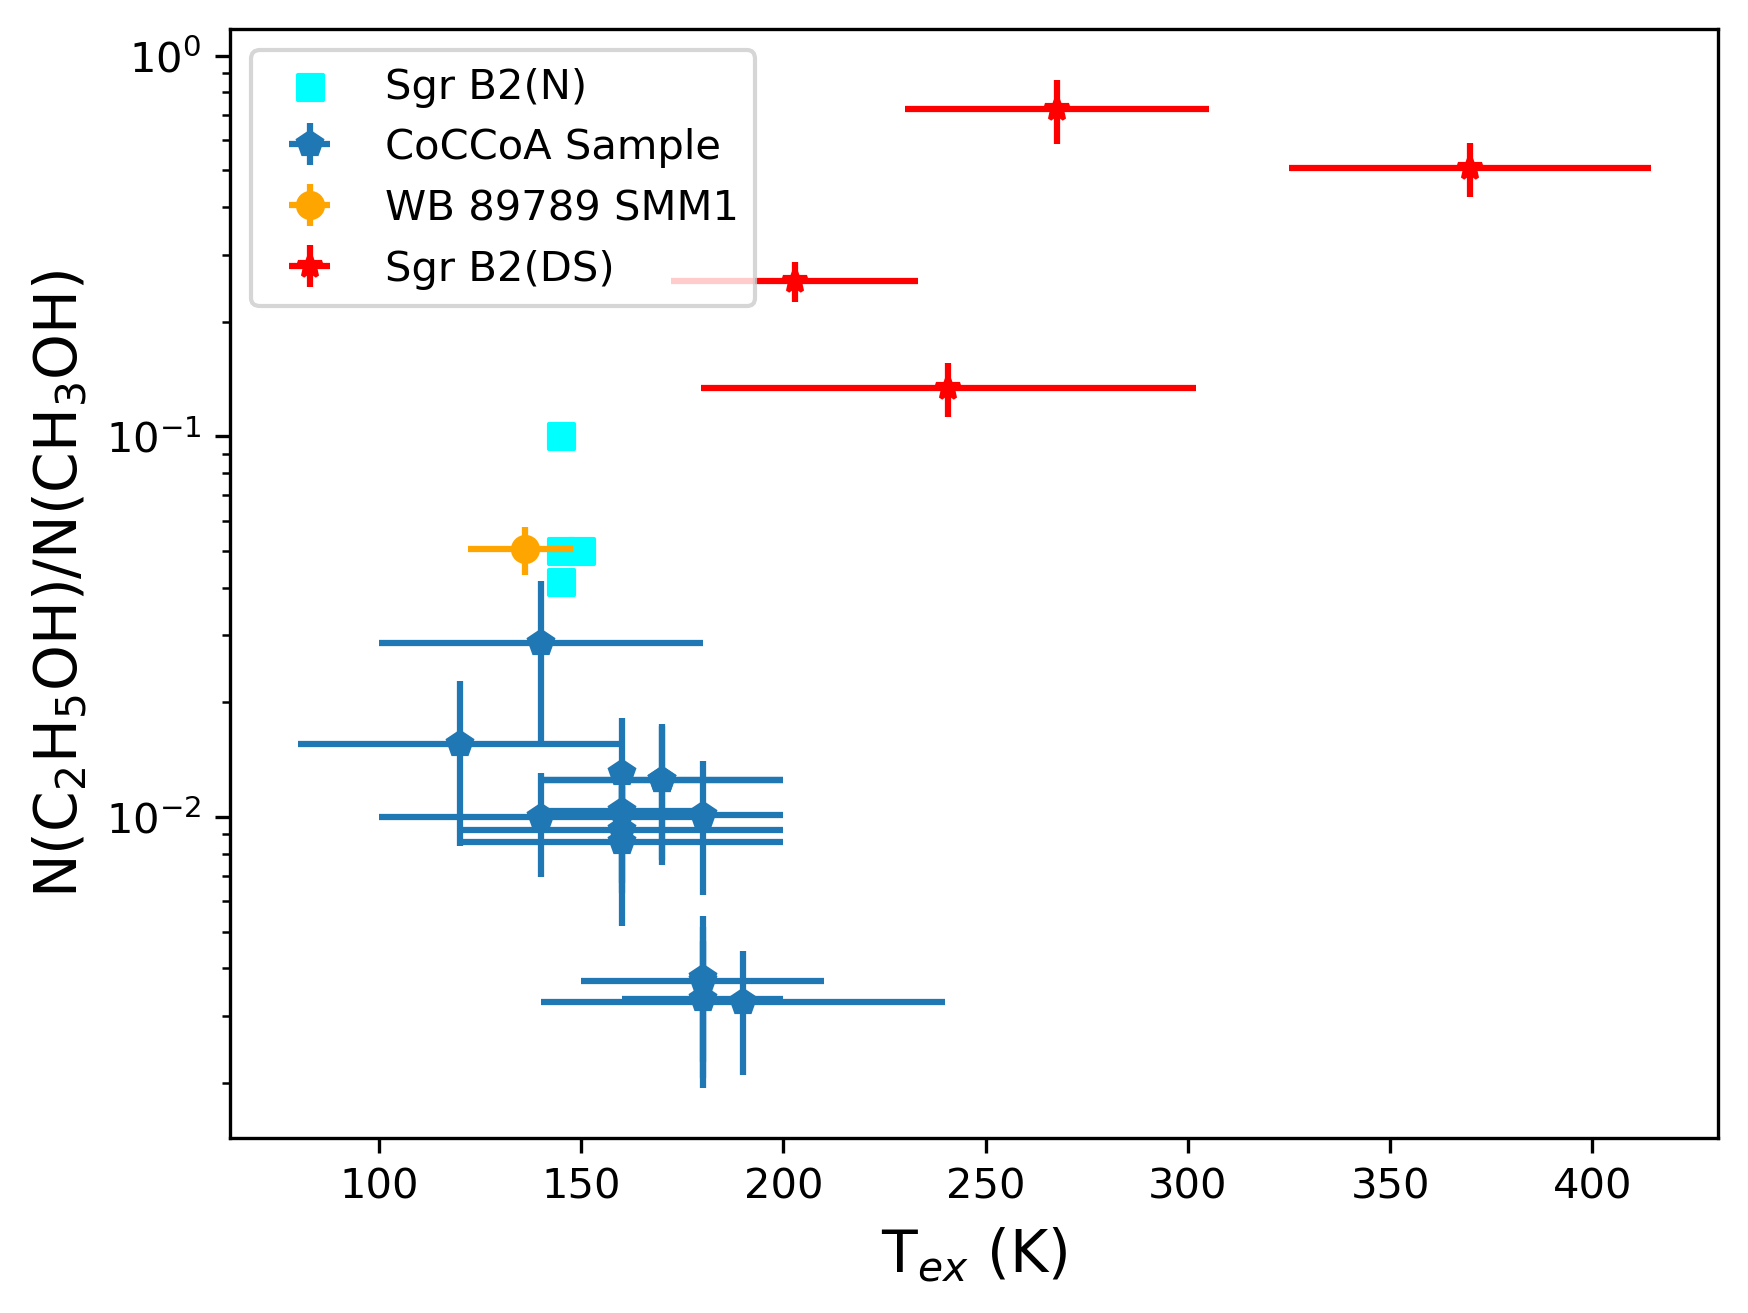

In [19]:
plt.errorbar(chen2023_datatable['Tex_C2H5OH'],chen2023_datatable['Ethanol_Methanol_Ratio'],yerr=chen2023_datatable['Error_Ethanol_Methanol_Ratio'],xerr=chen2023_datatable['Error_Tex_C2H5OH'],fmt='p',label='CoCCoA Sample')
plt.errorbar(shimonishi2021_ethanoltrot,shimonishi2021_ethanolmethanolratio,xerr=shimonishi2021_ethanoltroterror,yerr=shimonishi2021_ethanolmethanolratioerror,fmt='o',color='orange',label='WB 89789 SMM1')
plt.scatter(bonfand2019_trots,bonfand2019_ethanolmethanolratio,color='cyan',marker='s',label='Sgr B2(N)')
plt.errorbar(dsratiomeasurements['Trot_C2H5OH'],dsratiomeasurements['Ethanol_Methanol_Ratio_central'],yerr=dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central'],xerr=dsratiomeasurements['Error_Trot_C2H5OH'],fmt='*',label='Sgr B2(DS)',color='red')
plt.yscale('log')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('T$_{ex}$ (K)',fontsize=14)
plt.legend()
plt.savefig(plothome+'abundanceratiovstex.png')
plt.show()

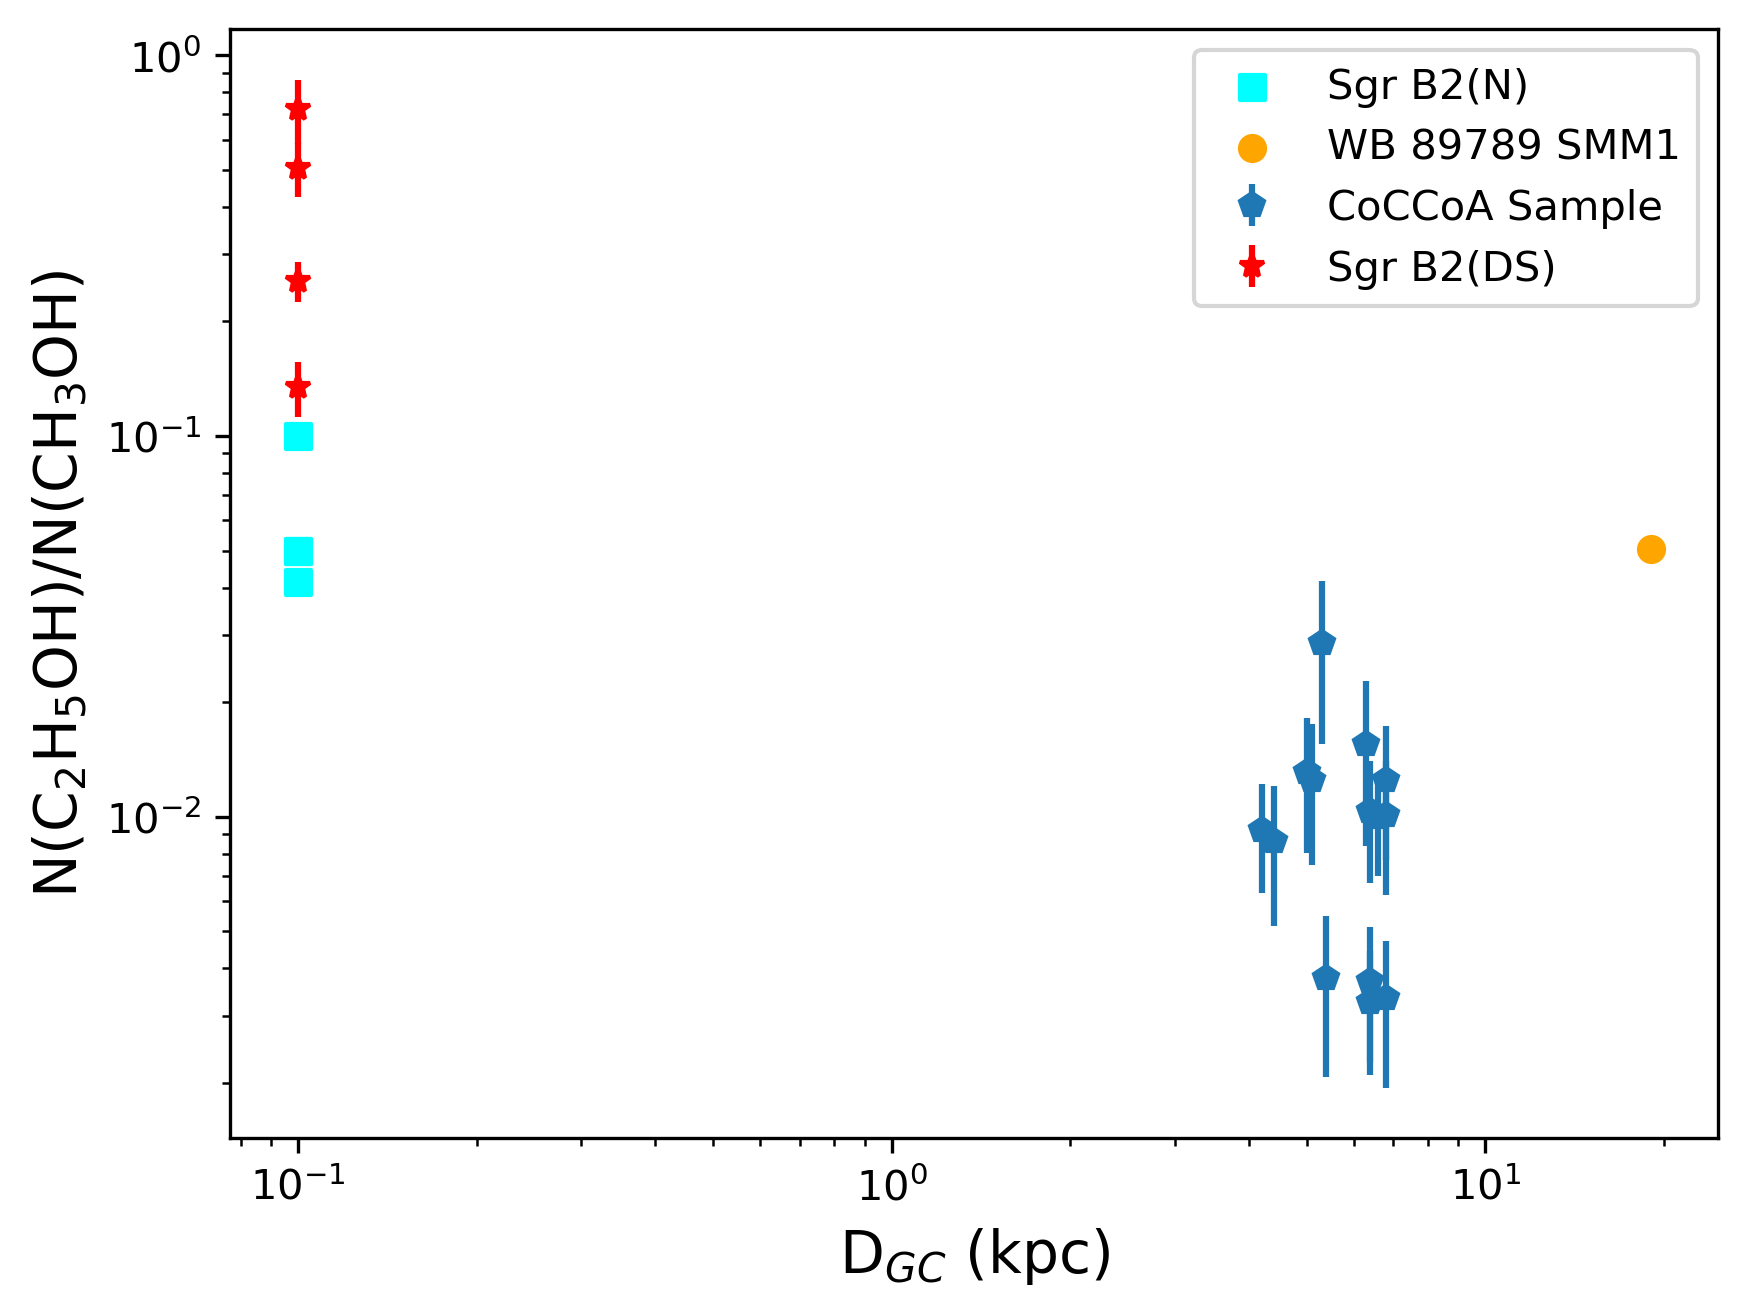

In [20]:
plt.errorbar(chen2023_datatable['Galactocentric_Distance'],chen2023_datatable['Ethanol_Methanol_Ratio'],yerr=chen2023_datatable['Error_Ethanol_Methanol_Ratio'],fmt='p',label='CoCCoA Sample')
plt.scatter(bonfand2019_distances,bonfand2019_ethanolmethanolratio,color='cyan',marker='s',label='Sgr B2(N)')
plt.scatter(shimonishi2021_distance,shimonishi2021_ethanolmethanolratio,color='orange',marker='o',label='WB 89789 SMM1')
plt.errorbar(ds_distances,dsratiomeasurements['Ethanol_Methanol_Ratio_central'],yerr=dsratiomeasurements['Error_Ethanol_Methanol_Ratio_central'],fmt='*',label='Sgr B2(DS)',color='red')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('D$_{GC}$ (kpc)',fontsize=14)
plt.legend()
plt.savefig(plothome+'abundanceratiovsgalactocentricdistance.png')
plt.show()